<Axes: >

<Axes: >

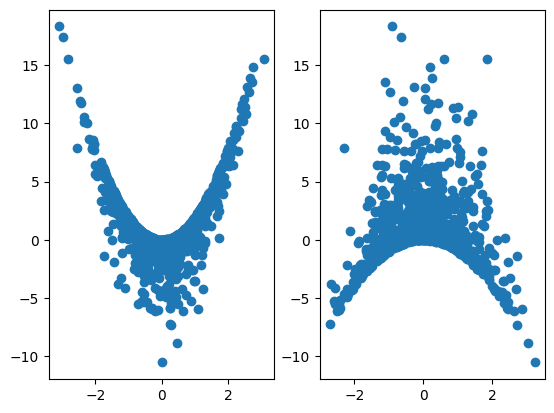

In [1]:
# 设置随机数种子
torch.manual_seed(420)

# 创建最高项为2的多项式回归数据集
features,labels = tensorGenReg(w=[2,-1],bias=False,deg=2)

# 绘制图像查看数据分布
plt.subplot(121)
plt.scatter(features[:,0],labels)
plt.subplot(122)
plt.scatter(features[:,1],labels)

# 进行数据集切分与加载
train_loader,test_loader = split_loader(features,labels)

In [7]:
# 镜像Sigmoid激活函数
class MirrorSigmoid_class1(nn.Module):
    def __init__(self, in_features=2, n_hidden=4, out_features=1, bias=True):
        super().__init__()
        self.linear1 = nn.Linear(in_features, n_hidden, bias=bias)
        self.linear2 = nn.Linear(n_hidden, out_features, bias=bias)
        
    def forward(self, x):
        z1 = self.linear1(x)
        p1 = 1 - 1 / (1 + torch.exp(-z1))
        out = self.linear2(p1)
        return out

In [3]:
# Sigmoid激活函数
class Sigmoid_class1(nn.Module):
    def __init__(self,in_features=2,n_hidden=4,out_features=1,bias=True):
        super().__init__()
        self.linear1 = nn.Linear(in_features,n_hidden,bias=bias)
        self.linear2 = nn.Linear(n_hidden,out_features,bias=bias)
        
    def forward(self,x):
        z1 = self.linear1(x)
        p1 = torch.sigmoid(z1)
        out = self.linear2(p1)
        return out
    
# tanh激活函数
class tanh_class1(nn.Module):
    def __init__(self,in_features=2, n_hidden=4, out_features=1, bias=True):
        super().__init__()
        self.linear1 = nn.Linear(in_features,n_hidden,bias=bias)
        self.linear2 = nn.Linear(n_hidden,out_features,bias=bias)
    
    def forward(self,x):
        z1 = self.linear1(x)
        p1 = torch.tanh(z1)
        out = self.linear2(p1)
        return out

# ReLu激活函数
class ReLu_class1(nn.Module):
    def __init__(self,in_features=2,n_hidden=4,out_features=1,bias=True):
        super().__init__()
        self.linear1 = nn.Linear(in_features,n_hidden,bias=bias)
        self.linear2 = nn.Linear(n_hidden,out_features,bias=bias)
    
    def forward(self,x):
        z1 = self.linear1(x)
        p1 = torch.relu(z1)
        out = self.linear2(p1)
        return out

In [5]:
class LR_class1(nn.Module):
    # 此处隐藏层设置四个激活函数
    def __init__(self,in_features=2,n_hidden=4,out_features=1):
        super().__init__()
        self.linear1 = nn.Linear(in_features,n_hidden)
        self.linear2 = nn.Linear(n_hidden,out_features)
        
    def forward(self,x):
        z1 = self.linear1(x)
        out = self.linear2(z1)
        return out

In [8]:
torch.manual_seed(420)

LR1 = LR_class1()
sigmoid_model1 = Sigmoid_class1()
tanh_model1 = tanh_class1()
relu_model1 = ReLu_class1()
mirror_sigmoid_model1 = MirrorSigmoid_class1()

# 将实例化后的模型放在一个列表容器中
model_l = [LR1, sigmoid_model1, tanh_model1, relu_model1, mirror_sigmoid_model1]
name_l = ['LR1', 'sigmoid_model1', 'tanh_model1', 'relu_model1', 'mirror_sigmoid_model1']

num_epochs = 30
lr = 0.03

mse_train = torch.zeros(len(model_l), num_epochs)
mse_test = torch.zeros(len(model_l), num_epochs)

for epochs in range(num_epochs):
    for i, model in enumerate(model_l):
        fit(net=model,
            criterion=nn.MSELoss(),
            optimizer=optim.SGD(model.parameters(), lr=lr),
            batchdata=train_loader,
            epochs=epochs)
        mse_train[i][epochs] = mse_cal(train_loader, model).detach()
        mse_test[i][epochs] = mse_cal(test_loader, model).detach()

Text(0.5, 1.0, 'mse_train')

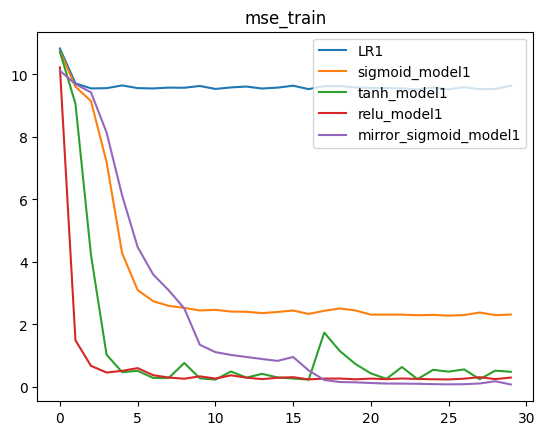

In [10]:
# 训练误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), mse_train[i], label=name)
plt.legend(loc=1)
plt.title('mse_train')

Text(0.5, 1.0, 'mse_test')

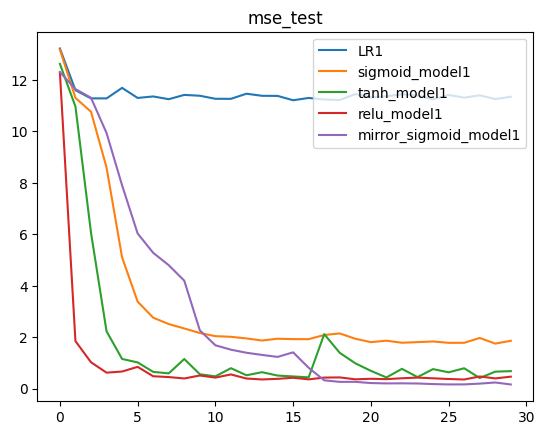

In [11]:
# 测试误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), mse_test[i], label=name)
plt.legend(loc=1)
plt.title('mse_test')

In [1]:
import seaborn as sns

def weights_vp(model,att="grad"):
    '''
    :param model:观察对象(模型)
    :param att:选择参数梯度(grad)还是参数取值(weights)进行观察
    :return:对应att的小提琴图
    '''
    vp = []
    for i ,m in enumerate(model.modules()):
        if isinstance(m,nn.Linear):
            if att == "grad":
                vp_x = m.weight.grad.detach().reshape(-1,1).numpy()
            else:
                vp_x = m.weight.detach().reshape(-1,1).numpy()
            vp_y = np.full_like(vp_x,i)
            vp_a = np.concatenate((vp_x,vp_y),1)
            vp.append(vp_a)
    vp_r = np.concatenate((vp),0)
    ax = sns.violinplot(y = vp_r[:,0],x = vp_r[:,1])
    ax.set(xlabel = 'num_hidden',title = att) 

In [2]:
# 设置随机数种子
torch.manual_seed(420)

# 创建最高项为2的多项式回归数据集
features,labels = tensorGenReg(w=[2,-1],bias=False,deg=2)

# 进行数据集切分与加载
train_loader,test_loader = split_loader(features,labels)

sigmoid_model3 = Sigmoid_class3()

In [3]:
fit(net=sigmoid_model3
   ,criterion=nn.MSELoss()
   ,optimizer=optim.SGD(sigmoid_model3.parameters(),lr = 0.03)
   ,batchdata=train_loader
   ,epochs=5
   ,cla=False)

F:\app2\Anaconda\envs\pytorch3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\app2\Anaconda\envs\pytorch3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\app2\Anaconda\envs\pytorch3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


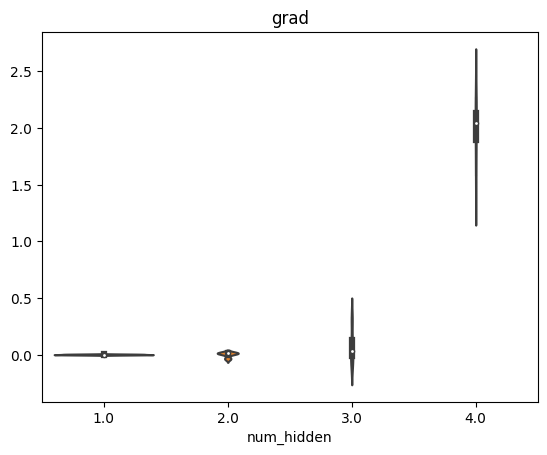

In [4]:
weights_vp(sigmoid_model3,att="grad")

F:\app2\Anaconda\envs\pytorch3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\app2\Anaconda\envs\pytorch3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\app2\Anaconda\envs\pytorch3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


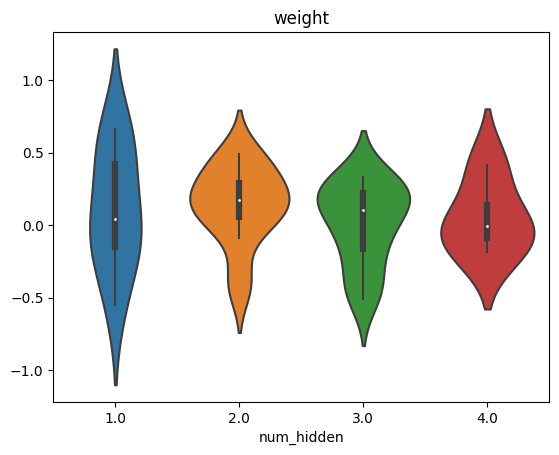

In [12]:
weights_vp(sigmoid_model3,att="weight")

<Axes: >

<Axes: >

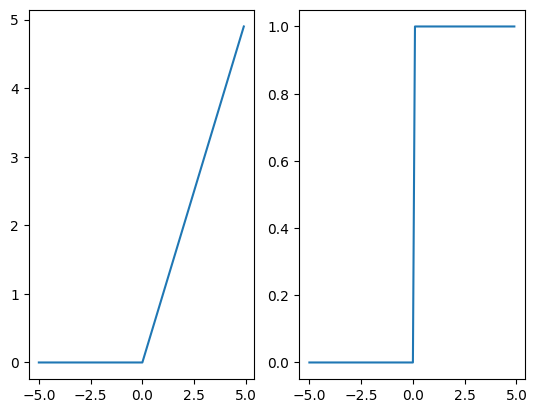

In [41]:
X = torch.arange(-5,5,0.1)
X.requires_grad = True
relu_y = torch.relu(X)
relu_y.sum().backward()
plt.subplot(121)
plt.plot(X.detach(),relu_y.detach())
plt.subplot(122)
plt.plot(X.detach(),X.grad.detach())

<Axes: >

<Axes: >

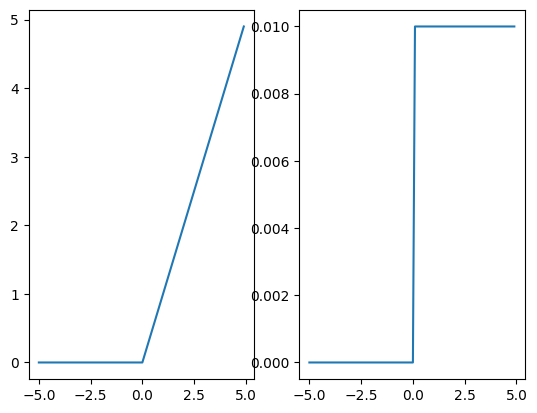

In [42]:
X = torch.arange(-5,5,0.1)
X.requires_grad = True
relu_y = torch.relu(X)
relu_y.mean().backward()
plt.subplot(121)
plt.plot(X.detach(),relu_y.detach())
plt.subplot(122)
plt.plot(X.detach(),X.grad.detach())

<Axes: >

<Axes: >

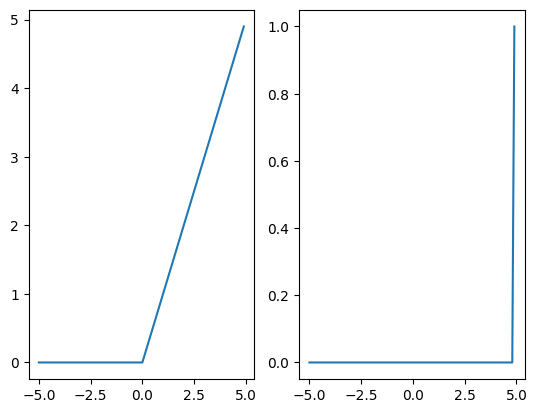

In [43]:
X = torch.arange(-5,5,0.1)
X.requires_grad = True
relu_y = torch.relu(X)
relu_y.max().backward()
plt.subplot(121)
plt.plot(X.detach(),relu_y.detach())
plt.subplot(122)
plt.plot(X.detach(),X.grad.detach())

<Axes: >

<Axes: >

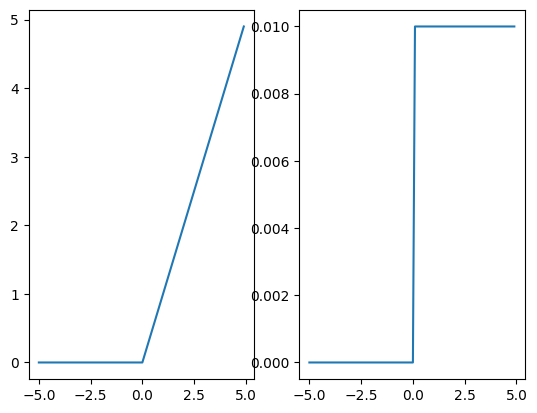

In [40]:
X = torch.arange(-5,5,0.1)
X.requires_grad = True
relu_y = torch.relu(X)
relu_y.min().backward()
plt.subplot(121)
plt.plot(X.detach(),relu_y.detach())
plt.subplot(122)
plt.plot(X.detach(),X.grad.detach())

In [6]:
# 设置随机数种子
torch.manual_seed(420)

# 创建最高项为2的多项式回归数据集
features,labels = tensorGenReg(w = [2,-1],bias=False,deg=2)

# 进行数据集切分与加载
train_loader,test_loader = split_loader(features,labels)

# 初始化核心参数
lr = 0.03
num_epochs = 20

In [24]:
# 设置随机数种子
torch.manual_seed(420)

# 实例化模型
sigmoid_model3_b = Sigmoid_class3() # 使用Xavier初始化参数
sigmoid_model3_a = Sigmoid_class3() # 保留原参数


# 修改init模型初始化参数
for m in sigmoid_model3_b.modules():
    if isinstance(m,nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        
# 创建模型容器
model_l = [sigmoid_model3_a,sigmoid_model3_b]
name_l = ['sigmoid_model3_a','sigmoid_model3_b']

Parameter containing:
tensor([[ 0.7995, -0.2561],
        [-0.1097, -0.0529],
        [-0.8137,  0.8860],
        [-0.0984,  0.9770]], requires_grad=True)

Parameter containing:
tensor([[ 0.7130,  0.3764, -0.0196, -0.0096],
        [ 0.0199, -0.8417, -0.2067, -0.4007],
        [-0.0515,  0.1059, -0.6787,  0.6582],
        [ 0.7072,  0.5386,  0.3889,  0.1370]], requires_grad=True)

Parameter containing:
tensor([[-0.6241,  0.3488,  0.3069,  0.8371],
        [-0.8167,  0.7516,  0.6801,  0.1606],
        [ 0.2885,  0.1036, -0.0692,  0.1744],
        [ 0.5015,  0.0987, -0.0787, -0.0286]], requires_grad=True)

Parameter containing:
tensor([[-0.8437, -0.5244,  0.8917,  0.0646]], requires_grad=True)

In [28]:
train_l,test_l = model_comparison(model_l=model_l
                                 ,name_l=name_l
                                 ,train_data=train_loader
                                 ,test_data=test_loader
                                 ,num_epochs=10
                                 ,criterion=nn.MSELoss()
                                 ,optimizer=optim.SGD
                                 ,lr=lr
                                 ,cla=False
                                 ,eva=mse_cal)

F:\app2\Anaconda\envs\pytorch3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\app2\Anaconda\envs\pytorch3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\app2\Anaconda\envs\pytorch3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


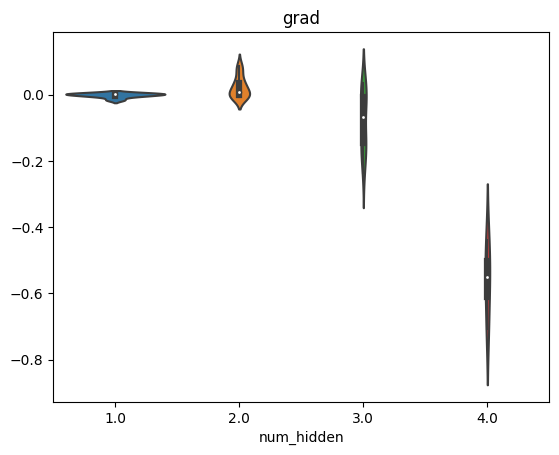

In [29]:
weights_vp(sigmoid_model3_a,att="grad")

F:\app2\Anaconda\envs\pytorch3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\app2\Anaconda\envs\pytorch3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\app2\Anaconda\envs\pytorch3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


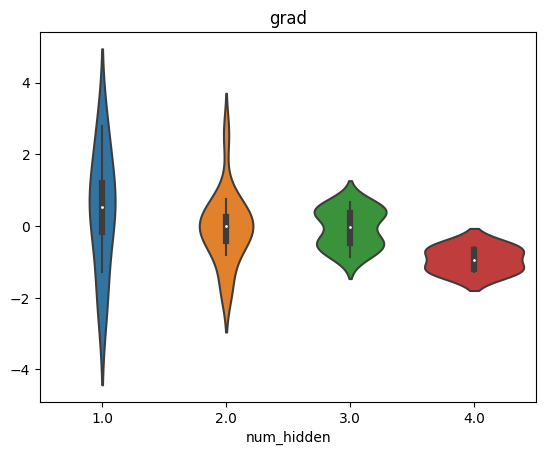

In [30]:
weights_vp(sigmoid_model3_b,att="grad")